In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
image=cv2.imread('Desktop/Allproject/imageClassification/testimage/000011.png')
image.shape

(1214, 1000, 3)

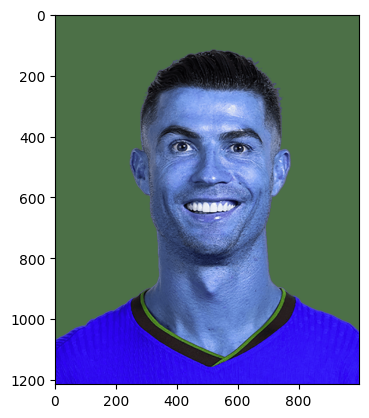

In [3]:
plt.imshow(image)

In [4]:
grayimage=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
grayimage.shape

(1214, 1000)

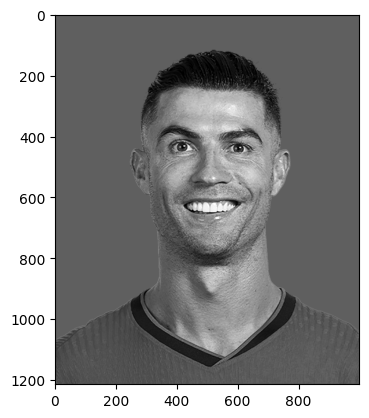

In [5]:
plt.imshow(grayimage,cmap='gray')

In [6]:
faces_cascade=cv2.CascadeClassifier('Desktop/Allproject/imageClassification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade=cv2.CascadeClassifier('Desktop/Allproject/imageClassification/model/opencv/haarcascades/haarcascade_eye.xml')
faces=faces_cascade.detectMultiScale(grayimage,1.3,6)
faces

array([[268, 231, 496, 496]], dtype=int32)

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(268), np.int32(231), np.int32(496), np.int32(496))

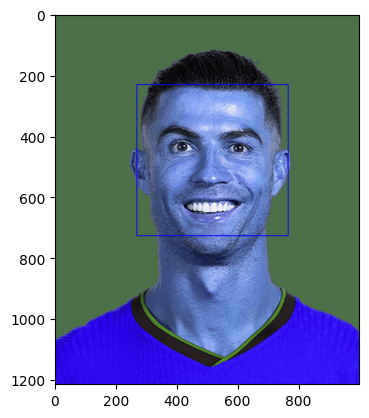

In [8]:
face_img=cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(face_img)

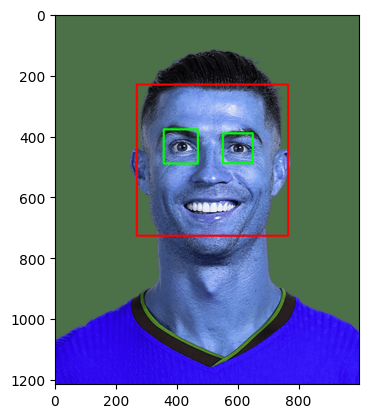

In [15]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),5)
    rol_gray=grayimage[y:y+h,x:x+w]
    rol_color=face_img[y:y+h,x:x+w]
    eyes=eyes_cascade.detectMultiScale(rol_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(rol_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

In [11]:
#this code block get cropped face is the two eyes is  present
def get_cropped_face_if_2_eyes(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert it to grayscale (better for detection)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    detected_faces = faces_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # Loop through each detected face
    for (x, y, w, h) in detected_faces:
        # Crop out the face area in both gray and color
        face_gray = gray_image[y:y+h, x:x+w]
        face_color = image[y:y+h, x:x+w]

        # Detect eyes in the gray face region
        detected_eyes = eyes_cascade.detectMultiScale(face_gray)

        # If at least 2 eyes are found, return the color face
        if len(detected_eyes) >= 2:
            return face_color

    # If no valid face with 2 eyes is found, return None
    return None

    

In [12]:
Ronaldo_cropped_face=get_cropped_face_if_2_eyes('Desktop/Allproject/imageClassification/testimage/000011.png')
Ronaldo_cropped_face

array([[[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       ...,

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]]

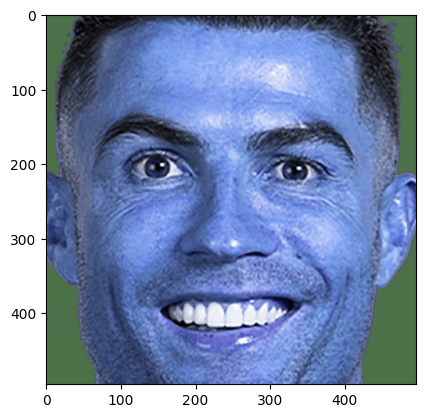

In [13]:
plt.imshow(Ronaldo_cropped_face)

In [14]:
blocked_ronaldo_face=get_cropped_face_if_2_eyes('Desktop/Allproject/imageClassification/testimage/000046.jpg')
blocked_ronaldo_face

In [15]:
images_folder='Desktop/Allproject/imageClassification/webscrape'
cropped_folder='Desktop/Allproject/imageClassification/croppedFolder'

In [16]:
import os
folderArr=[]
dir=os.scandir(images_folder)
for i in dir:
    if i.is_dir():
        folderArr.append(i.path)
print(folderArr)


['Desktop/Allproject/imageClassification/webscrape\\mbappe', 'Desktop/Allproject/imageClassification/webscrape\\messi', 'Desktop/Allproject/imageClassification/webscrape\\neymar', 'Desktop/Allproject/imageClassification/webscrape\\ronaldo', 'Desktop/Allproject/imageClassification/webscrape\\Salah']


In [17]:
folderArr

['Desktop/Allproject/imageClassification/webscrape\\mbappe',
 'Desktop/Allproject/imageClassification/webscrape\\messi',
 'Desktop/Allproject/imageClassification/webscrape\\neymar',
 'Desktop/Allproject/imageClassification/webscrape\\ronaldo',
 'Desktop/Allproject/imageClassification/webscrape\\Salah']

In [18]:
import shutil
if os.path.exists(cropped_folder):
    shutil.rmtree(cropped_folder)
try:
    os.makedirs(cropped_folder,exist_ok=True)
except Exception as e:
    print('an error occured',e)

In [19]:
import os
cropped_images_dirs=[]
footballers_dict={}
count=1
for img_dir in folderArr:
    footballer_name = os.path.basename(os.path.normpath(img_dir))
    # print(footballer_name)
    footballers_dict[footballer_name]=[]
    

    for  entry in os.scandir(img_dir):
        rol_color=get_cropped_face_if_2_eyes(entry.path)
        if rol_color is not None:
            
            footballer_cropped=cropped_folder + footballer_name
            if not os.path.exists(footballer_cropped):
                os.makedirs(footballer_cropped)
                cropped_images_dirs.append(cropped_folder)
                print(footballer_cropped)
            cropped_file_name=footballer_name + str(count) + '.png'
            cropped_file_path=footballer_cropped + '/' + cropped_file_name
            cv2.imwrite(cropped_file_path,rol_color)
            footballers_dict[footballer_name].append(cropped_file_path)
            count +=1
        

In [20]:
import numpy as np
import pywt
import cv2

def w2d(Img, mode='haar', level=1):  # 'haar' is often used as the default mode for wavelets
    ImArray = Img  # Use Img as the input image
    ImArray = cv2.cvtColor(ImArray, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale

    # Convert the image to float32
    ImArray = np.float32(ImArray)  # Fix here: Only pass ImArray to np.float32
    
    # Apply wavelet transform
    coeffs = pywt.wavedec2(ImArray, mode, level=level)  # Perform 2D wavelet decomposition

    coeffs_w = list(coeffs)  # Convert coefficients to list
    coeffs_w[0] *= 0  # Example operation: zero out the approximation coefficients

    # Reconstruct the image from the modified coefficients
    ImArray_w = pywt.waverec2(coeffs_w, mode)  # Reconstruct the image

    # Scale the image back to [0, 255] and convert to uint8
    ImArray_w *= 255
    ImArray_w = np.uint8(ImArray_w)

    return ImArray_w


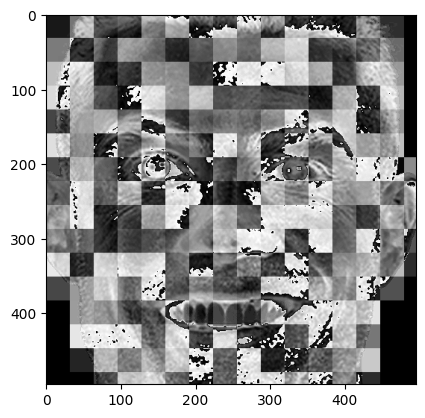

In [21]:
im_hair=w2d(Ronaldo_cropped_face,'db1',5)
plt.imshow(im_hair,cmap='gray')

In [22]:
target_dict={}
count=0
for footballerName in footballers_dict.keys():
    target_dict[footballerName]=count
    count+=1
target_dict

{'mbappe': 0, 'messi': 1, 'neymar': 2, 'ronaldo': 3, 'Salah': 4}

In [23]:
X=[]
Y=[]
for footballer_name, training_files in footballers_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))  # Color image

        img_hair = w2d(img, 'db1', 5)  # Wavelet transform (grayscale)
        scalled_image_hair = cv2.resize(img_hair, (32, 32))

        # Reshape both images correctly
        scalled_raw_img_flat = scalled_raw_img.reshape(32 * 32 * 3, 1)
        scalled_image_hair_flat = scalled_image_hair.reshape(32 * 32, 1)

        # Combine using vstack
        combined_image = np.vstack((scalled_raw_img_flat, scalled_image_hair_flat))

        X.append(combined_image)
        Y.append(target_dict[footballer_name])


In [26]:
len(Y)

151

In [27]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(151, 4096)

In [28]:
import pandas as pd
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,41.0,65.0,71.0,43.0,65.0,72.0,43.0,65.0,71.0,44.0,...,51.0,245.0,231.0,12.0,108.0,95.0,166.0,27.0,28.0,47.0
1,43.0,41.0,40.0,34.0,35.0,39.0,51.0,53.0,63.0,215.0,...,20.0,252.0,54.0,230.0,36.0,23.0,238.0,130.0,228.0,236.0
2,87.0,84.0,85.0,25.0,25.0,31.0,36.0,38.0,48.0,64.0,...,78.0,15.0,18.0,21.0,31.0,36.0,36.0,36.0,0.0,0.0
3,96.0,103.0,122.0,99.0,113.0,131.0,103.0,117.0,139.0,95.0,...,15.0,191.0,190.0,197.0,94.0,101.0,75.0,12.0,76.0,55.0
4,71.0,42.0,35.0,65.0,42.0,38.0,54.0,41.0,47.0,82.0,...,184.0,193.0,222.0,208.0,115.0,115.0,114.0,114.0,112.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,12.0,16.0,17.0,16.0,17.0,21.0,12.0,13.0,17.0,24.0,...,41.0,13.0,240.0,12.0,9.0,9.0,9.0,9.0,9.0,0.0
147,162.0,165.0,159.0,128.0,146.0,169.0,128.0,142.0,174.0,142.0,...,204.0,209.0,130.0,129.0,228.0,226.0,223.0,223.0,204.0,85.0
148,17.0,21.0,21.0,17.0,21.0,20.0,20.0,20.0,20.0,18.0,...,59.0,59.0,59.0,56.0,56.0,56.0,223.0,223.0,219.0,221.0
149,10.0,5.0,4.0,13.0,5.0,5.0,9.0,4.0,4.0,24.0,...,53.0,56.0,62.0,52.0,59.0,63.0,65.0,66.0,209.0,209.0


In [29]:
Ydf=pd.DataFrame(Y)
Ydf

,0
0,0
1,0
2,0
3,0
4,0
...,...
146,4
147,4
148,4
149,4


In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7105263157894737

In [32]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.80      0.73      0.76        11
           2       1.00      0.73      0.84        11
           3       0.50      1.00      0.67         6
           4       0.40      0.67      0.50         3

    accuracy                           0.71        38
   macro avg       0.74      0.71      0.67        38
weighted avg       0.82      0.71      0.72        38



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'model__C': [1, 10, 100, 1000],
            'model__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'model__C': [1, 5, 10]
        }
    }
}


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler

scores = []
best_estimator = {}

for algo, np in model_params.items():
    # Use Pipeline with named steps
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', np['model'])
    ])

    clf = GridSearchCV(pipe, np['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)

    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    best_estimator[algo] = clf.best_estimator_

# fix typo: dataFrame -> DataFrame, columns -> pass as keyword
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logisti

,model,best_score,best_params
0,svm,0.681423,"{'model__C': 1, 'model__kernel': 'linear'}"
1,random_forest,0.586561,{'model__n_estimators': 5}
2,logistic_regression,0.709091,{'model__C': 1}


In [36]:
best_estimator['svm'].score(X_test,y_test)

0.7368421052631579

In [37]:
best_estimator['random_forest'].score(X_test,y_test)

0.6578947368421053

In [38]:
best_estimator['logistic_regression'].score(X_test,y_test)

0.7894736842105263

In [39]:
model=best_estimator['svm']

In [40]:
reshape=X[115].reshape(1,-1)
reshape
model.predict(reshape)

array([3])

In [41]:
import joblib 
joblib.dump(model,'image_model.pkl')

['image_model.pkl']

In [42]:
print (target_dict)

{'mbappe': 0, 'messi': 1, 'neymar': 2, 'ronaldo': 3, 'Salah': 4}


In [46]:
import json as j
with open('footballer_column.json','w') as f:
    f.write(j.dumps(target_dict))